In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
number = data.select_dtypes(include = np.number)
number

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

y=number["Total Claim Amount"]
x=number.drop("Total Claim Amount", axis=1)
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:25:12   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            72.3910      8.744      8.279      0.000      55.252      89.530
Customer Lifetime Value          -0.0007      0.000     -2.014      0.044      -0.001   -1.81e-05
Income                           -0.0033   6.95e-05    -47.370      0.000      -0.003      -0.003
Monthly Premium Auto              5.3425      0.067     79.934      0.000       5.212       5.474
Months Since Last Claim          -0.1457      0.210     -0.695      0.487      -0.557       0.265
Months Since Policy Inception    -0.1023      0.076     -1.352      0.176      -0.251       0.046
Number of Open Complaints        -1.3716      2.319     -0.591      0.554      -5.918       3.174
Number of Policies                0.2486      0.883      0.281      0.778      -1.483       1.980
==============================================================================
Omnibus:                      994.270   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6389.170
Skew:                           0.316   Prob(JB):                         0.00
Kurtosis:                       7.048   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
nulls_p = (number.isna().sum()/len(data))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns=["Columna", "Porcentaje"]
nulls_p

,Columna,Porcentaje
0,Customer Lifetime Value,0.0
1,Income,0.0
2,Monthly Premium Auto,0.0
3,Months Since Last Claim,0.0
4,Months Since Policy Inception,0.0
5,Number of Open Complaints,0.0
6,Number of Policies,0.0
7,Total Claim Amount,0.0


In [8]:
number.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
number =number.drop("Total Claim Amount", axis=1)

<AxesSubplot:>

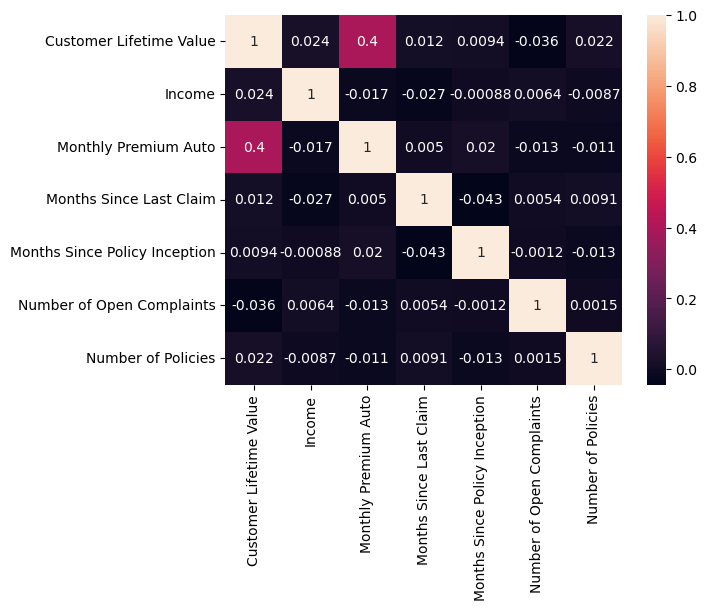

In [10]:
corr_matrix=number.corr()
sns.heatmap(corr_matrix,annot=True)

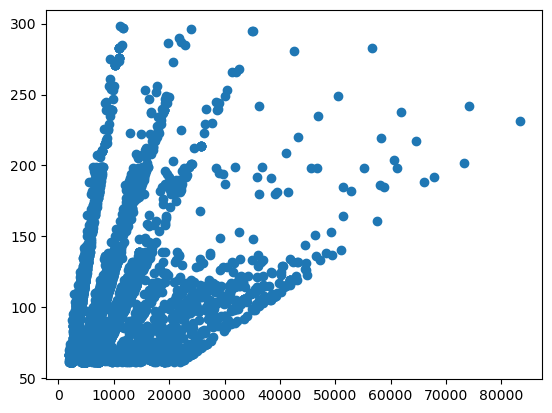

In [11]:
plt.scatter(x=number["Customer Lifetime Value"],y=number["Monthly Premium Auto"])

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

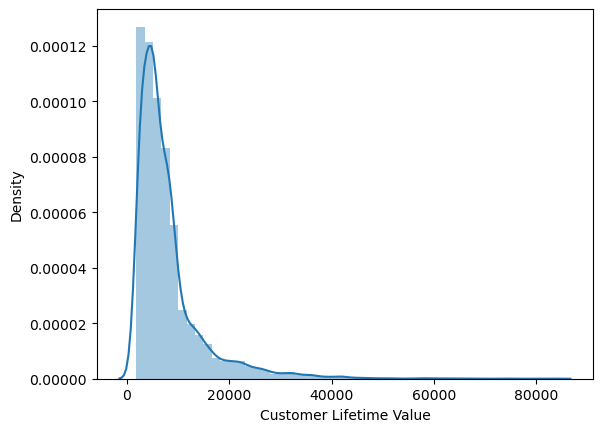

In [12]:
sns.distplot(number["Customer Lifetime Value"])

<AxesSubplot:xlabel='Customer Lifetime Value'>

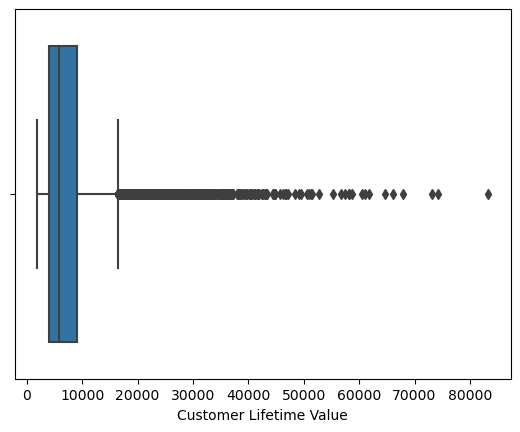

In [13]:
sns.boxplot(number["Customer Lifetime Value"])

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

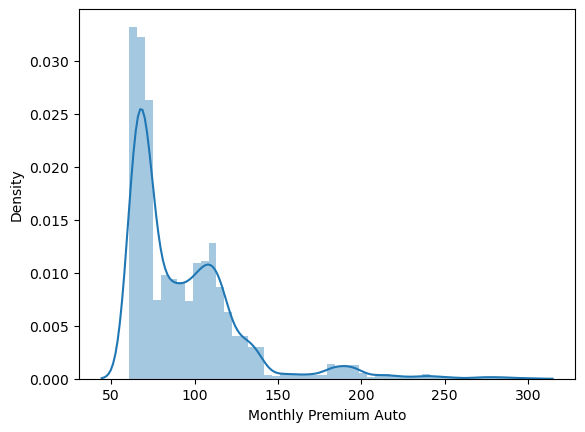

In [14]:
sns.distplot(number["Monthly Premium Auto"])

<AxesSubplot:xlabel='Monthly Premium Auto'>

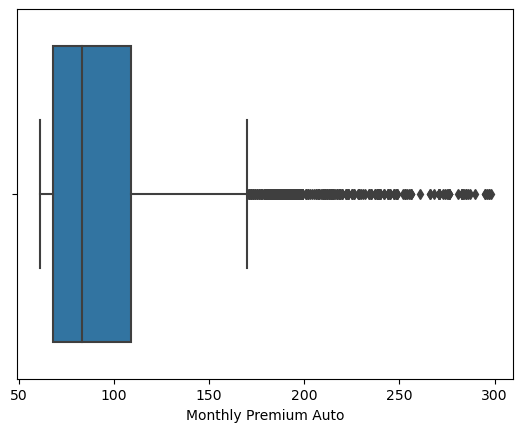

In [15]:
sns.boxplot(number["Monthly Premium Auto"])

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

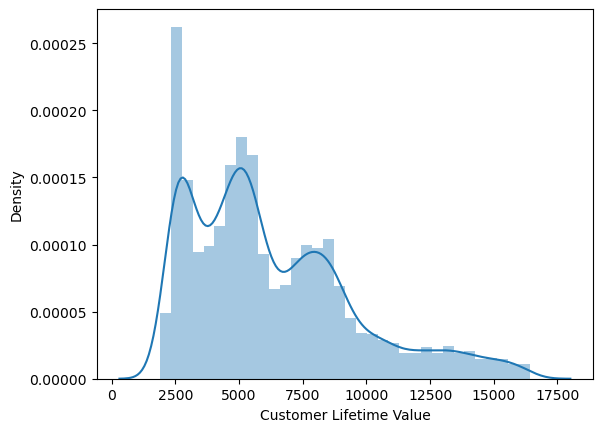

In [16]:
iqr = np.percentile(number['Customer Lifetime Value'],75) - np.percentile(number['Customer Lifetime Value'],25)
upper_limit = np.percentile(number['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(number['Customer Lifetime Value'],25) - 1.5*iqr
number1 = number[(number['Customer Lifetime Value']>lower_limit) & (number['Customer Lifetime Value']<upper_limit)]
sns.distplot(number1['Customer Lifetime Value'])

<AxesSubplot:xlabel='Customer Lifetime Value'>

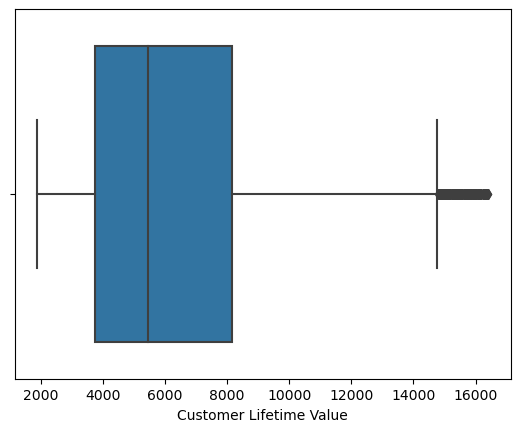

In [17]:
sns.boxplot(number1['Customer Lifetime Value'])

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

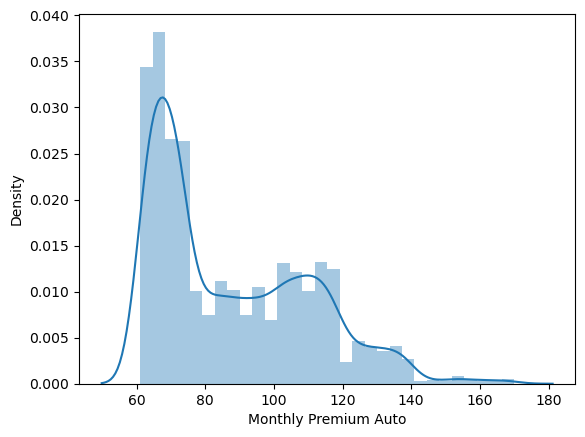

In [18]:
iqr = np.percentile(number['Monthly Premium Auto'],75) - np.percentile(number['Monthly Premium Auto'],25)
upper_limit = np.percentile(number['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(number['Monthly Premium Auto'],25) - 1.5*iqr
number1 = number[(number['Monthly Premium Auto']>lower_limit) & (number['Monthly Premium Auto']<upper_limit)]
sns.distplot(number1['Monthly Premium Auto'])

<AxesSubplot:xlabel='Monthly Premium Auto'>

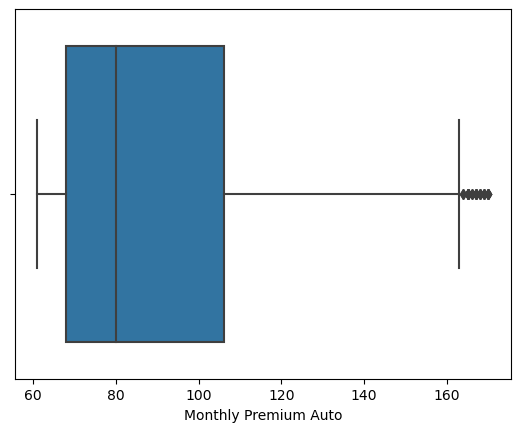

In [19]:
sns.boxplot(number1['Monthly Premium Auto'])

<AxesSubplot:ylabel='Density'>

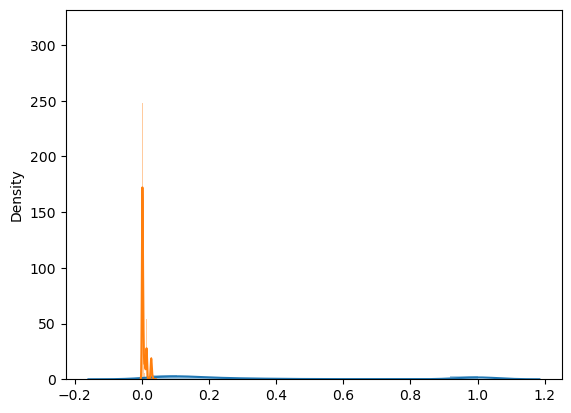

In [20]:
transformer = Normalizer().fit(number)
x_normalizer = transformer.transform(number)

sns.distplot(x_normalizer.T[0])
sns.distplot(x_normalizer.T[2])

In [21]:
transformer = MinMaxScaler().fit(number)
x_minmax = transformer.transform(number)

<AxesSubplot:ylabel='Density'>

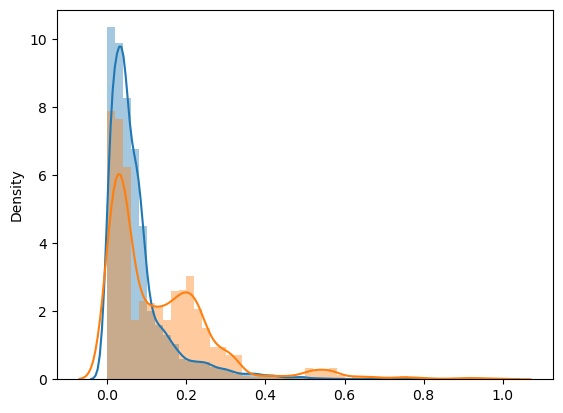

In [22]:
sns.distplot(x_minmax.T[0])
sns.distplot(x_minmax.T[2])

In [23]:
x_cat = data.select_dtypes(include="object")
x_cat = data.drop("Effective To Date", axis=1)
x_cat

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first").fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [25]:
from sklearn.preprocessing import LabelEncoder
lebel = x_cat.apply(LabelEncoder().fit_transform)
lebel

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,4,975,0,0,0,1,0,3322,1,...,5,0,0,0,2,0,0,2941,5,1
1,5946,0,4659,0,1,0,4,0,0,1,...,42,0,7,1,5,2,0,4880,0,1
2,96,2,6900,0,2,0,1,0,2820,1,...,38,0,1,1,5,0,0,3897,5,1
3,8016,1,5140,0,0,0,4,1,0,1,...,65,0,6,0,1,0,2,3764,3,1
4,2488,4,1058,0,0,0,1,1,2510,0,...,44,0,0,1,3,0,0,1138,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,1,7701,0,0,0,1,1,4331,2,...,89,0,1,1,3,1,3,1564,0,1
9130,5390,1,1390,1,1,1,1,0,551,1,...,28,0,0,0,2,0,1,2902,0,1
9131,6688,1,5516,0,1,0,4,1,0,1,...,37,3,1,0,1,0,1,4538,0,1
9132,7214,1,5041,0,1,1,1,1,589,1,...,3,0,2,1,4,2,1,4304,0,0


In [26]:
data_transformed = np.concatenate([lebel,x_minmax],axis=1)
data_transformed

array([[6.00000000e+02, 4.00000000e+00, 9.75000000e+02, ...,
        5.05050505e-02, 0.00000000e+00, 0.00000000e+00],
       [5.94600000e+03, 0.00000000e+00, 4.65900000e+03, ...,
        4.24242424e-01, 0.00000000e+00, 8.75000000e-01],
       [9.60000000e+01, 2.00000000e+00, 6.90000000e+03, ...,
        3.83838384e-01, 0.00000000e+00, 1.25000000e-01],
       ...,
       [6.68800000e+03, 1.00000000e+00, 5.51600000e+03, ...,
        3.73737374e-01, 6.00000000e-01, 1.25000000e-01],
       [7.21400000e+03, 1.00000000e+00, 5.04100000e+03, ...,
        3.03030303e-02, 0.00000000e+00, 2.50000000e-01],
       [8.43400000e+03, 1.00000000e+00, 6.88000000e+02, ...,
        9.09090909e-01, 0.00000000e+00, 0.00000000e+00]])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test = train_test_split(data_transformed,data["Total Claim Amount"],test_size=0.2,random_state=19) 
lm=linear_model.LinearRegression().fit(x_train,y_train)
predictions=lm.predict(x_train)

In [28]:
predictions

array([ 392.48942205,  387.80970778,  669.47661176, ...,  146.80376742,
         67.26959099, 1050.81158522])

In [29]:
y_train

5202     355.114822
1581     372.362565
8062     566.400000
5699    1943.772393
8792     413.252330
           ...     
6452     302.400000
1043     328.870868
5032     150.693773
1378      93.623377
757     1254.137899
Name: Total Claim Amount, Length: 7307, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
r2_score(y_train,predictions)

0.8661700245245363

In [31]:
mean_squared_error(y_train,predictions)

11351.94058942387

In [32]:
median_absolute_error(y_train,predictions)

46.32113690516195

In [33]:
mean_absolute_error(y_train,predictions)

62.42306420734385

In [38]:
data_transformede = pd.DataFrame(data_transformed)
data_transformede.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,1.741734,4014.059229,0.143201,0.480622,1.554084,1.825706,0.490037,2078.134005,0.979089,...,2853.993103,1.892380,1.089556,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771
std,2636.903013,1.287771,2328.042818,0.350297,0.655817,1.381978,1.347793,0.499928,1878.233775,0.605732,...,1290.348454,2.072992,0.537313,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2283.250000,1.000000,1996.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2108.250000,0.000000,1.000000,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000
50%,4566.500000,1.000000,3990.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1782.500000,1.000000,...,2935.500000,0.000000,1.000000,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000
75%,6849.750000,3.000000,6047.750000,0.000000,1.000000,3.000000,4.000000,1.000000,3731.750000,1.000000,...,3825.750000,4.000000,1.000000,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000
max,9133.000000,4.000000,8040.000000,1.000000,2.000000,4.000000,4.000000,1.000000,5693.000000,2.000000,...,5105.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
